In [12]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [13]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [14]:
N = 1000

I0 = 10 
S0 = N - I0
R0 = 0

beta = 0.3
mu = 1/3

T = 1000

In [15]:
def SIR_det(T = 1000, N=1000, I0 = 10, R0=0, beta = 0.3, mu = 1/3):
    
    S0 = N-10 
    
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for t in range(T - 1): 

        del_S = beta * S[t] * I[t] / N
        del_R = mu * I[t]

        S[t+1] = S[t] - del_S
        I[t+1] = I[t] + del_S - del_R
        R[t+1] = R[t] + del_R
    
    return S,I,R

In [16]:
def SIR_stochastic(T=1000, N=1000, I0=10, R0=0, beta=0.3, mu=1/3):
    
    S0 = N-I0
    
    S = np.zeros(T)
    I = np.zeros(T)
    R = np.zeros(T)
    
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for t in range(T - 1): 
        force = 1 - (1 - beta/N)**I[t]

        del_S = np.random.binomial(S[t], force)
        del_R = np.random.binomial(I[t], mu)

        S[t+1] = S[t] - del_S
        I[t+1] = I[t] + del_S - del_R
        R[t+1] = R[t] + del_R
    
    
    return S,I,R

In [17]:
def plotter(SIR, T, title):
    x = range(T)
    plt.figure(figsize=(15,10))
    plt.plot(x, SIR[0], label='Susceptible')
    plt.plot(x, SIR[1], label='Infected')
    plt.plot(x, SIR[2], label='Recovered')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title(title)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


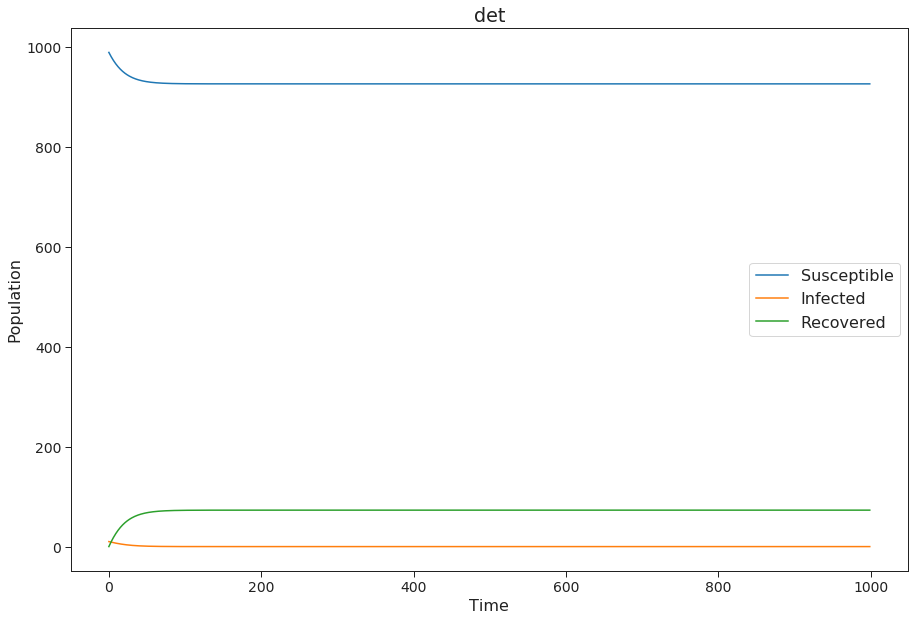

In [19]:
SIR_det = SIR_det(T = 1000)
plotter(SIR_det, 1000, 'det')

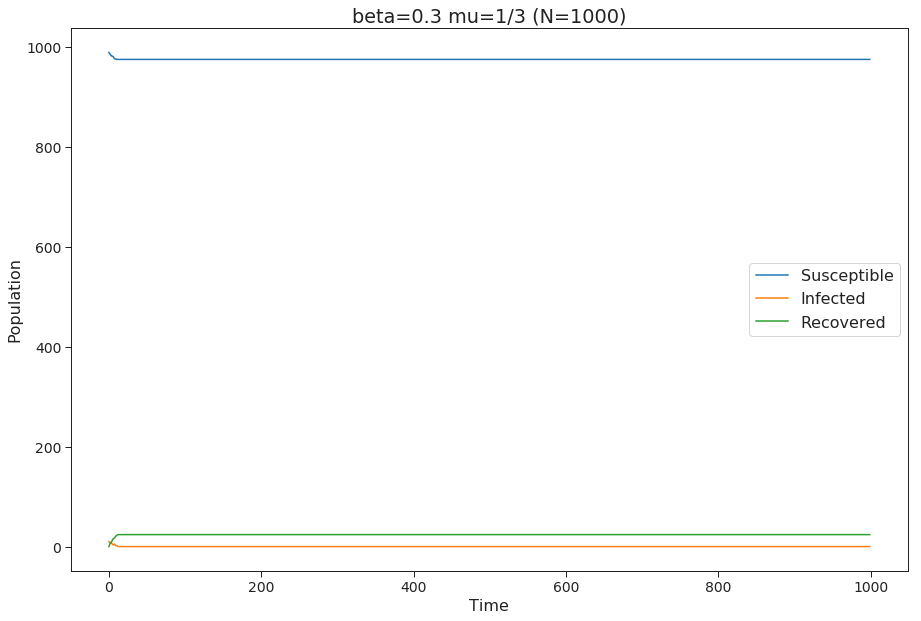

In [20]:
SIR1 = SIR_stochastic()
plotter(SIR1, 1000, 'beta=0.3 mu=1/3 (N=1000)')

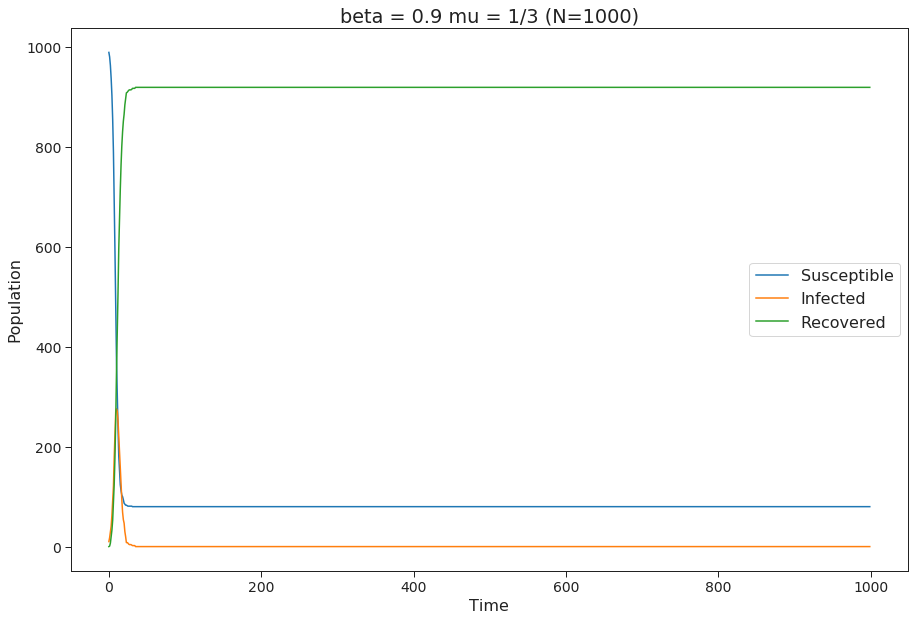

In [21]:
SIR2 = SIR_stochastic(beta=0.9)
plotter(SIR2, T, 'beta = 0.9 mu = 1/3 (N=1000)')

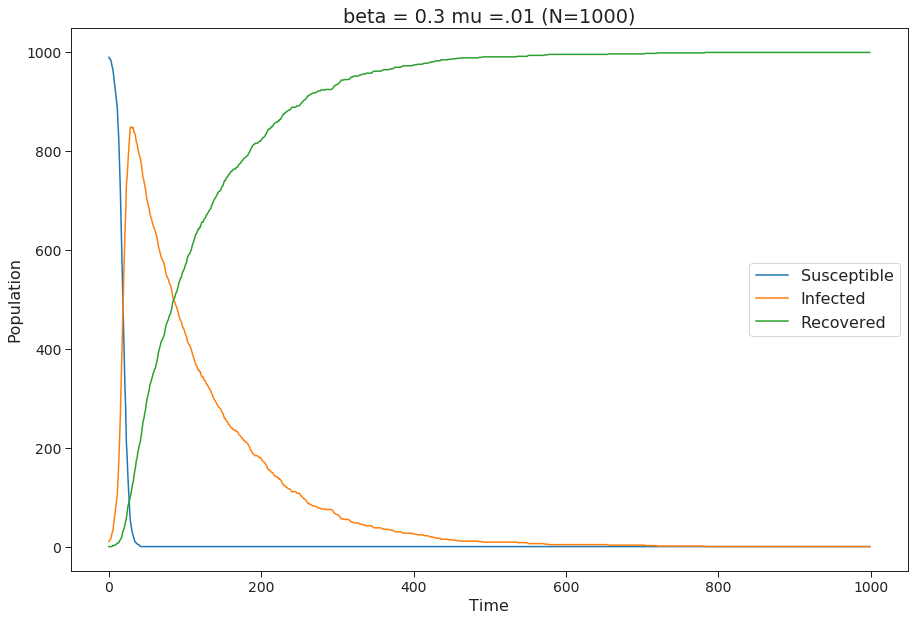

In [22]:
SIR3 = SIR_stochastic(mu=0.01)
plotter(SIR3, 1000, 'beta = 0.3 mu =.01 (N=1000)')

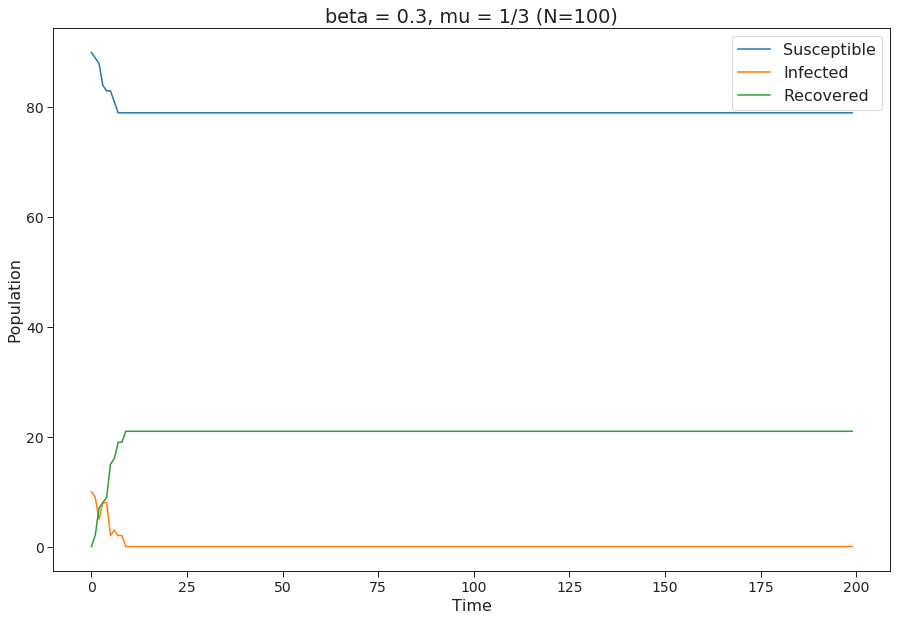

In [23]:
SIR4 = SIR_stochastic(T = 200,N=100, I0=10)
plotter(SIR4, 200, 'beta = 0.3, mu = 1/3 (N=100)')

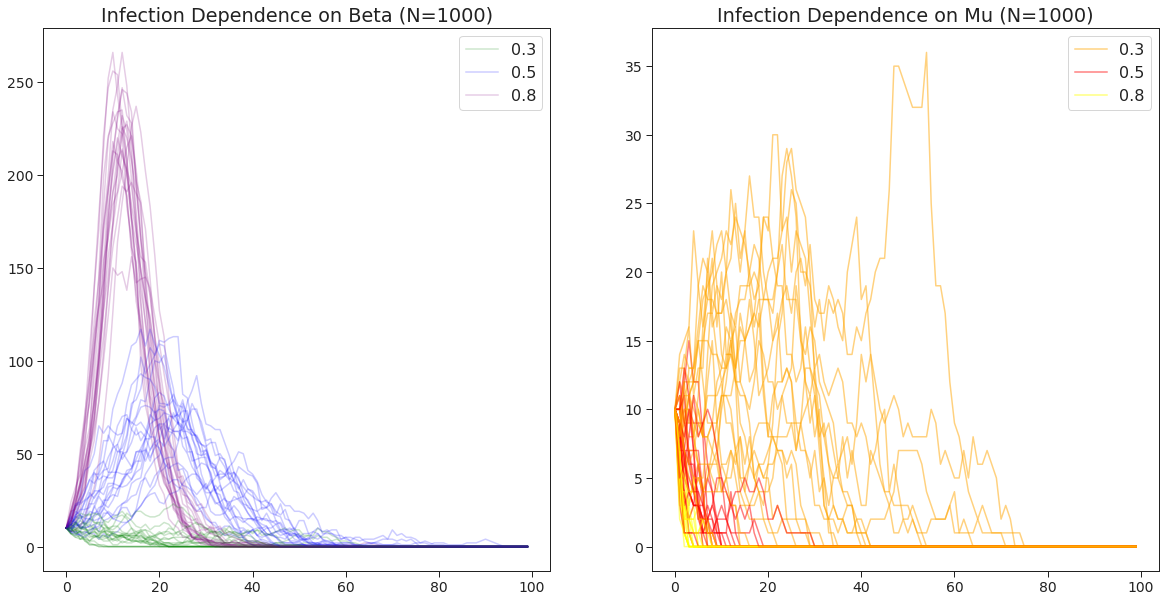

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
for n in range(20):
    for i in [(3, 'green'), (5, 'blue'), (8, 'purple')]:
        x = range(100)
        beta = i[0]/10
        SIR = SIR_stochastic(T = 100, beta = beta)
        plt.plot(x, SIR[1], color = i[1], alpha=0.2)
plt.legend(['0.3', '0.5', '0.8'])
plt.title('Infection Dependence on Beta (N=1000)')

plt.subplot(1,2,2)
for n in range(20):
    for i in [(3, 'orange'), (5, 'red'), (8, 'yellow')]:
        x = range(100)
        mu = i[0]/10
        SIR = SIR_stochastic(T = 100, mu = mu)
        plt.plot(x, SIR[1], color = i[1], alpha=0.5)
plt.legend(['0.3', '0.5', '0.8'])
plt.title('Infection Dependence on Mu (N=1000)')
plt.show()

Text(0.5, 1.0, 'Infection Dependence on Beta (N=1000)')

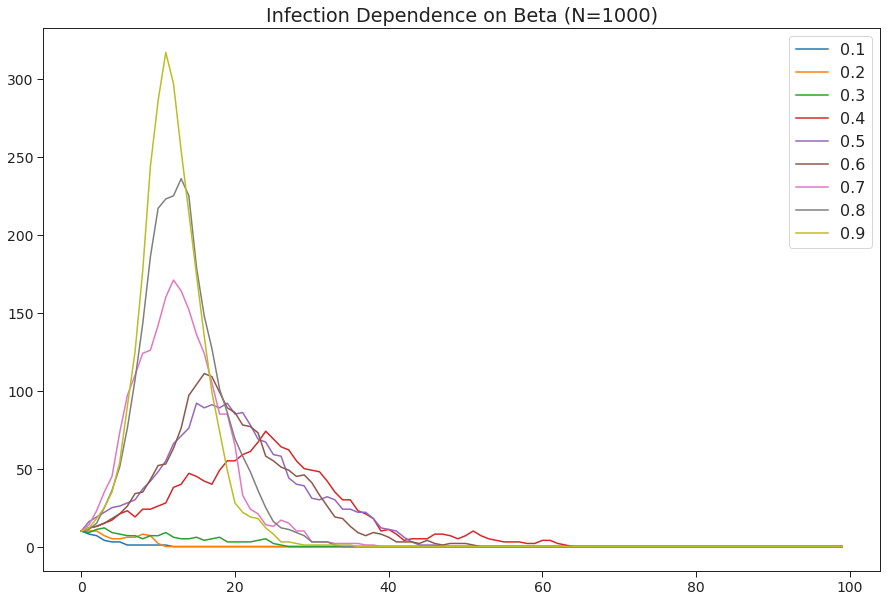

In [16]:
plt.figure(figsize = (15,10))
for i in range(1,10):
    x = range(100)
    beta = i/10
    SIR = SIR_stochastic(T = 100, beta = beta)
    plt.plot(x, SIR[1], label='%s' % beta)
plt.legend()
plt.title('Infection Dependence on Beta (N=1000)')

Text(0.5, 1.0, 'Infection Dependence on Mu (N = 1000)')

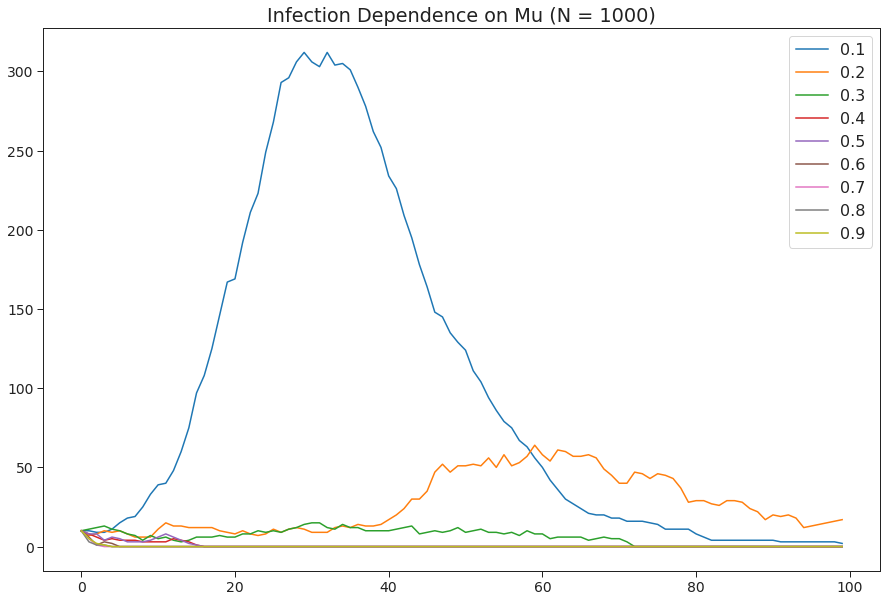

In [17]:
plt.figure(figsize = (15,10))
for i in range(1,10):
    x = range(100)
    mu = i/10
    SIR = SIR_stochastic(T = 100, mu = mu)
    plt.plot(x, SIR[1], label='%s' % mu)
plt.legend()
plt.title('Infection Dependence on Mu (N = 1000)')

Text(0.5, 1.0, 'Total Percentage Recovered (mu=0.5)')

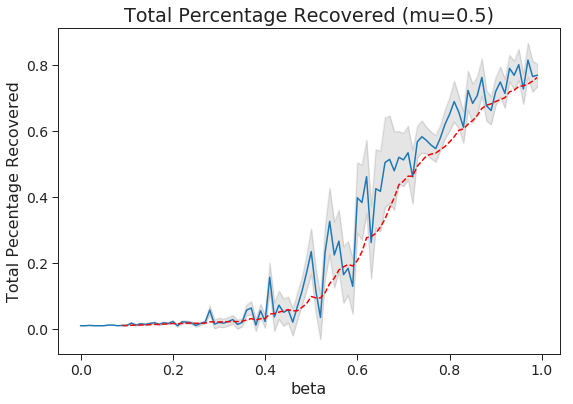

In [30]:
plt.figure(figsize=(9,6))
x = [i/100 for i in range(100)]
y = []
for t in range(100):
    SIR = SIR_stochastic(beta = t/100, mu = 1/2)
    y.append(sum(SIR[2])/(1000*1000))
    
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
rolling_mean = df.y.rolling(window=10).mean()

y_std = df.y.rolling(10).std()

y_err_p = [y[i] + y_std[i] for i in range(len(y))]
y_err_n = [y[i] - y_std[i] for i in range(len(y))]

plt.plot(df['x'], df['y'])
plt.plot(df['x'], rolling_mean, '--r')
plt.plot(df['x'], y_err_p, color = 'grey', alpha = 0.1)
plt.plot(df['x'], y_err_n, color = 'grey', alpha = 0.1)
plt.fill_between(x, y_err_p, y_err_n, alpha = 0.2, color='grey')
plt.ylabel('Total Pecentage Recovered')
plt.xlabel('beta')
plt.title('Total Percentage Recovered (mu=0.5)')

In [24]:
import seaborn as sns

In [25]:
k = 10
T = 1000
A = np.empty([k,k])
for i in range(1,k):
    beta = i/k
    for j in range(1,k):
        mu = j/k
        SIR = SIR_stochastic(beta = beta, mu = mu)
        A.itemset((i, j), sum(SIR[2])/(1000*T))

[Text(26.5, 0.5, 'beta'), Text(0.5, 8.5, 'mu')]

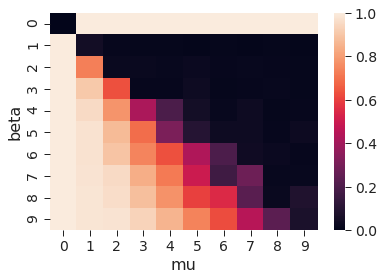

In [26]:
H = sns.heatmap(A)
H.set(xlabel='mu', ylabel='beta')